In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import scipy.stats as ss

from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Import Data

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.shape

(119390, 32)

In [6]:
cat = []
num = []

for col in df.columns:
    if df[col].dtypes == 'object':
        cat.append(col)
    else:
        num.append(col)
print(f'Categorical Feature : \n{cat}')
print(f'\nNumerical Feature : \n{num}')

Categorical Feature : 
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Numerical Feature : 
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## 1. Handling Missing Value

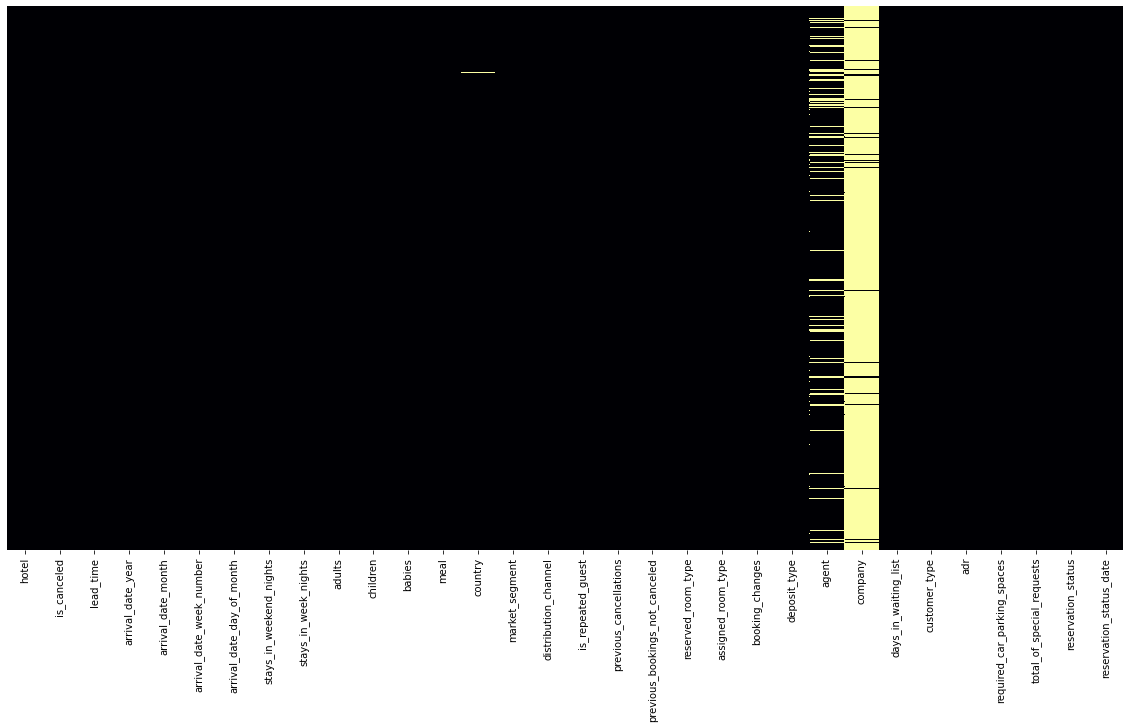

In [7]:
plt.figure(figsize=(20,10))

sns.heatmap(df.isna(), yticklabels=False, cmap='inferno', cbar=False)
plt.show()

In [8]:
for i in df.columns:
    if df[i].isna().sum() > 0:
        print(f'{i}, null sebesar {round(df[i].isna().mean()*100,2)}%, total null {df[i].isna().sum()}')

children, null sebesar 0.0%, total null 4
country, null sebesar 0.41%, total null 488
agent, null sebesar 13.69%, total null 16340
company, null sebesar 94.31%, total null 112593


In [9]:
df[ (df['market_segment'] == 'Undefined')|
    (df['distribution_channel'] == 'Undefined')
]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,1.0,0,HB,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,112.7,1,2,Check-Out,2015-07-10
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


- Dapat diketahui terdapat 4 kolom yang memiliki null
- Melihat keterkaitan kolom tersebut dengan kolom lain sebelum di drop atau di isi
- memilih opsi antara mengisi atau menghapus nilai atau baris yang null

In [10]:
df['company'].fillna(0, inplace=True)

Nan pada company menandakan bahwa dia tidak menggunakan jasa company untuk memesan sehingga bisa dikatakan 0

In [11]:
df['agent'].fillna(0, inplace=True)

Nan pada agent menandakan bahwa dia tidak menggunakan jasa agent untuk memesan sehingga bisa dikatakan 0

In [12]:
df['country'].fillna('PRT', inplace=True)

In [13]:
df = df[df['children'].isna()==False]

In [14]:
df.isnull().sum().sum()

0

In [15]:
df[(df['market_segment'] == 'Undefined')|(df['distribution_channel'] == 'Undefined')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,1.0,0,HB,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,0.0,0.0,0,Transient,112.7,1,2,Check-Out,2015-07-10


In [16]:
df['distribution_channel'].loc[14594] = 'Direct'

In [17]:
len(df[ (df['market_segment'] == 'Undefined')|(df['distribution_channel'] == 'Undefined')])

0

## 2. Feature Engineering

### - Correlation

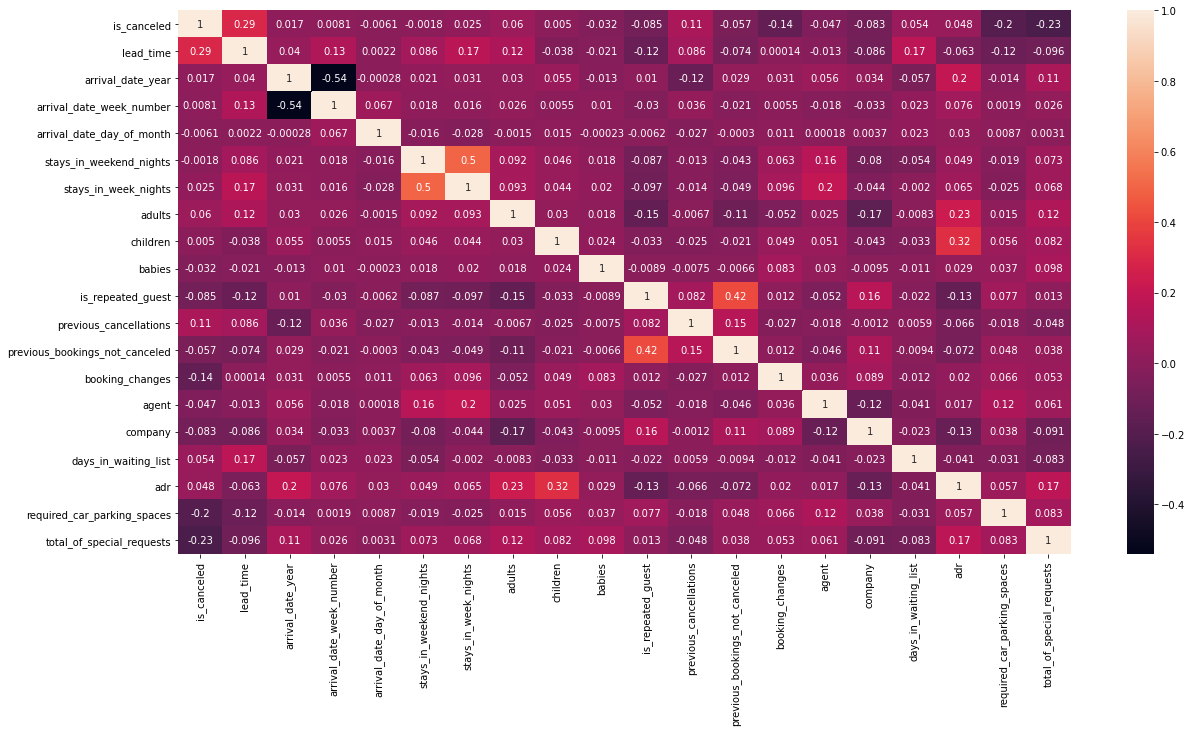

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
## Theils u
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

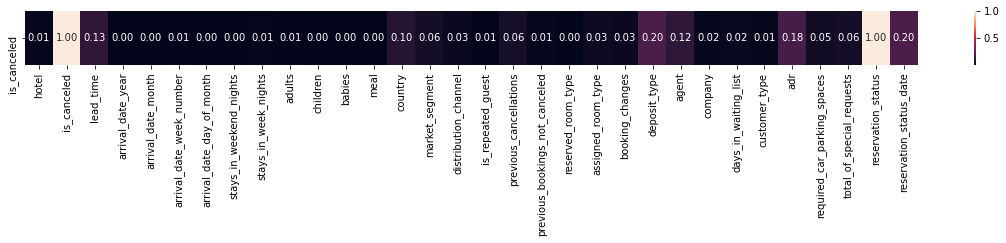

In [20]:
col = 'is_canceled'

theilu = pd.DataFrame(index=[col],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df[col].tolist(),df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

### - Feature Extraction

In [21]:
df['family'] = df['babies'] + df['children']
df['family'] = df['family'].apply(lambda x: 0 if x == 0 else 1)

Menambahkan feature family yang menandakan jika berkeluarga adalah 1 tidak adalah 0

In [22]:
df['stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

Menambahkan feature stays untuk mengetahui jumlah hari menginap

## 3. Handling Outliers

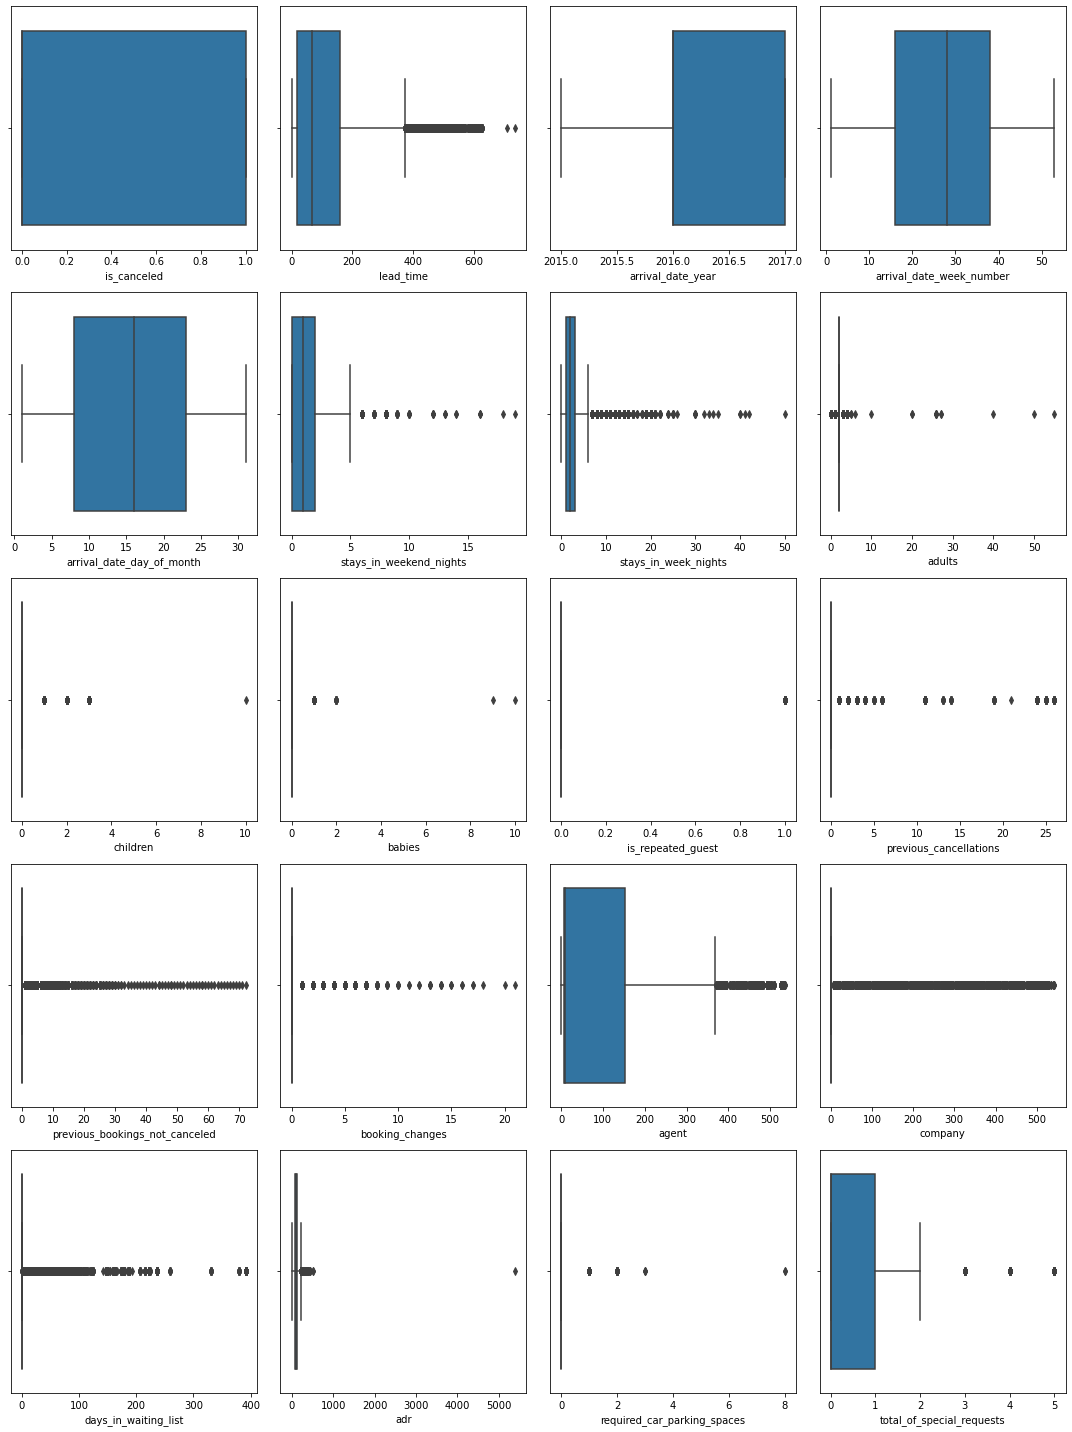

In [23]:
fig, axes = plt.subplots(5,4, figsize=(15,20))

for i,k in enumerate(num):
    l = i//4
    m = i%4    
    sns.boxplot(df[k], ax=axes[l,m])

plt.tight_layout()
plt.show()

Terdapat outlier pada adr. Namun terdapat outlier yang sangat berbeda jauh yaitu sebesar 5400, terlihat dari besar adr pertama dengan kedua yang berbeda jauh dan jumlah adults, stays dan pada bulan yang bisa dikatakan dengan adr yang biasa. Sehingga 5400 dapat dihilangkan

In [24]:
df = df[df['adr'] != 5400]

## 4. Encoding

In [25]:
cat

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

### - Binary

In [26]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [27]:
df['hotel'] = df['hotel'].apply(lambda x: 0 if x == 'Resort Hotel' else 1)

In [28]:
df['hotel'].unique()

array([0, 1], dtype=int64)

In [29]:
df['country'] = df['country'].apply(lambda x: 0 if x == 'PRT' else 1)

In [30]:
df['country'].unique()

array([0, 1], dtype=int64)

In [31]:
df['agent'] = df['agent'].apply(lambda x: 0 if x == 0 else 1)

In [32]:
df['company'] = df['company'].apply(lambda x: 0 if x == 0 else 1)

Berikut feature dengan unique dengan 0 merupakan tidak pernah atau 0 kali dan 1 menyatakan sudah melakukan beberapa kali atau merepresentasikan ≥ 1

In [33]:
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].apply(lambda x: 0 if x == 0 else 1)

In [34]:
df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)

In [35]:
df['total_of_special_requests'] = df['total_of_special_requests'].apply(lambda x: 0 if x == 0 else 1)

In [36]:
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].apply(lambda x: 0 if x == 0 else 1)

### - Ordinal

In [37]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [38]:
df['meal'] = df['meal'].map({
    'Undefined' : 0,
    'SC' : 0,
    'BB' : 1,
    'HB' : 2,
    'FB' : 3
})

In [39]:
df['meal'].unique()

array([1, 3, 2, 0], dtype=int64)

In [40]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [41]:
df['deposit_type'] = df['deposit_type'].map({
    'No Deposit' : 0,
    'Refundable' : 1,
    'Non Refund' : 1
})
df['deposit_type'].unique()

array([0, 1], dtype=int64)

In [42]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [43]:
df['customer_type'] = df['customer_type'].map({
    'Transient' : 'Transient',
    'Transient-Party' : 'Transient-Party',
    'Contract' : 'Other',
    'Group' : 'Other'
})
df['customer_type'].unique()

array(['Transient', 'Other', 'Transient-Party'], dtype=object)

### - One Hot

In [44]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [45]:
df['market_segment'] = df['market_segment'].map({
    'Aviation' : 'Corporate',
    'Complementary' : 'Direct',
    'Corporate' : 'Corporate',
    'Online TA' : 'Online TA',
    'Offline TA/TO' : 'Offline TA/TO',
    'Groups' : 'Groups',
    'Direct' : 'Direct'
})

In [46]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Groups'],
      dtype=object)

In [47]:
df = pd.get_dummies(data=df, columns=[
    'market_segment',
    'arrival_date_month',
    'reserved_room_type',
    'distribution_channel',
    'customer_type'
])

## Drop Feature

In [48]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family,stays,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Other,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,C,3,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,737,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,C,4,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,7,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,C,0,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,13,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,A,0,0,1,0,0,75.0,0,0,Check-Out,2015-07-02,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,14,2015,27,1,0,2,2,0.0,0,1,1,0,0,0,A,0,0,1,0,0,98.0,0,1,Check-Out,2015-07-03,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [49]:
df = df.drop(columns=[
    'assigned_room_type',
    'reservation_status_date',
    'reservation_status'
])

- Assigned direpresentasikan reserved room type
- Reservation status merupakan is_canceled  yang sudah dirubah menjadi binary 0 dan 1

In [50]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,family,stays,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Other,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,3,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,737,2015,27,1,0,0,2,0.0,0,1,0,0,0,0,4,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,7,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,0,0,0,75.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,13,2015,27,1,0,1,1,0.0,0,1,1,0,0,0,0,0,1,0,0,75.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,14,2015,27,1,0,2,2,0.0,0,1,1,0,0,0,0,0,1,0,0,98.0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [51]:
df.to_csv('hotel_bookings_fe2.csv')